# 4.1 누락된 데이터 다루기

훈련 샘플에 하나 이상의 값이 누락된 경우를 자주 볼 수 있다.<br>

일반적으로 누락된 값은 **NaN(Not a Number)** 또는 **NULL** 등의 값으로 채워진다. <br>

대부분의 수치 계산 라이브러리는 누락된 값을 다룰 수 없거나 무시하면 예상치 못한 결과를 만든다.<br>

따라서 **누락된 데이터를 제거하거나 대체해야 한다**.

## 4.1.1 테이블 형태 데이터에서 누락된 값 식별

In [ ]:
import pandas as pd
from io import StringIO

In [ ]:
csv_data = \
'''A, B, C, D
1.0,2.0,3.0,4.0
5.0,6.0,,
,11.0,12.0,'''
# 파이썬 2.7을 사용하는 경우
# 다음과 같이 문자열을 유니코드로 변환해야 한다.
# csv_data = unicode(csv_data)

In [ ]:
df = pd.read_csv(StringIO(csv_data)) # StringIO(csv_data)
df

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,NaN
2,NaN,11.0,12.0,NaN


**StringIO 함수**를 사용하면 하드 디스크에 있는 일반 CSV 파일처럼 csv_data에 저장된 문자열을 읽어 판다스 DataFrame으로 변환할 수 있다.

In [ ]:
df.isnull()

,A,B,C,D
0,False,False,False,False
1,False,False,True,True
2,True,False,False,True


In [ ]:
df.isnull().sum()

A     1
 B    0
 C    1
 D    2
dtype: int64

**isnull 메소드**는 셀(cell)이 **수치 값을 담고 있는지**(False) 또는 **누락되어 있는지**(True)를 나타내는 불리언 값이 채워진 DataFrame을 반환한다.

| |A|B|C|D|
|:-:|:-:|:-:|:-:|:-:|
|0|False|False|False|False|
|1|False|False|True|True|
|2|True|False|False|True|

<br>

- *셀(cell): pandas에서 데이터프레임의 원소를 셀이라고 부른다.*
- *isnull 메소드는 셀 값이 None 또는 np.nan(np.NaN)일 경우 True를 반환한다.*
- *isnull 메소드의 다른 이름은 isna이다.*


df.isnull().sum()의 형태로 **sum 메소드**를 사용하면 각 열의 **누락된 값의 개수**를 얻을 수 있다.
<br>

B 셀에는 누락된 값이 없고, A와 C 셀에는 누락된 값이 한 개, D 셀에는 누락된 값이 두 개 있음을 확인할 수 있다.

|cell|bool|
|:----:|:----:|
| A | 1 |
| B | 0 |
| C | 1 |
| D | 2 |

<br>

- *pandas의 sum 메소드는 불리언 값 True를 1로 카운팅한다. (numpy의 sum 메소드와 동일하다.)*
- *sum 메소드의 axis 매개변수는 0을 기본값으로 가진다.*
- *axis가 0일 경우 하나의 행으로, 1일 경우 하나의 열로 더해진다.*

## 4.1.2 누락된 값이 있는 훈련 샘플이나 특성 제외

누락된 데이터를 다루는 가장 쉬운 방법은 데이터셋에서 해당 **훈련 샘플(행)**이나 **특성(열)**을 완전히 **삭제**하는 것이다.

In [ ]:
# axis가 0이면 누락된 값이 있는 행(row)을 삭제한다.
df.dropna(axis=0)

,A,B,C,D
0,1.0,2.0,3.0,4.0


In [ ]:
# axis가 1이면 누락된 값이 있는 열(column)을 삭제한다.
df.dropna(axis=1)

,B
0,2.0
1,6.0
2,11.0


In [ ]:
# 모든 행이 NaN일 때만 행을 삭제한다. (axis의 default가 0이므로 행을 삭제)
# 여기서는 모든 값이 NaN인 행이 없기 때문에 전체 배열이 반환된다.
# how의 default 값은 'any'
df.dropna(how='all')

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,NaN
2,NaN,11.0,12.0,NaN


In [ ]:
# NaN이 아닌 값이 네 개보다 작은 행을 삭제한다.
df.dropna(thresh=4)

,A,B,C,D
0,1.0,2.0,3.0,4.0


In [ ]:
# 특정 열에 NaN이 있는 행만 삭제한다.(여기서는 'A'열)
df.dropna(subset=['A'])

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,NaN


**누락된 데이터 제거의 단점**<br>

- 너무 많은 **데이터**를 제거하면 안정된 분석이 불가능하다.
- 너무 많은 **특성 열**을 제거하면 분류기가 클래스를 구분하는 데 필요한 중요한 정보를 잃을 위험이 있다.

In [ ]:
# 행과 열이 모두 NaN인 DataFrame 생성
test_data = \
'''A, B, C, D
1.0,2.0,3.0,
5.0,6.0,7.0,
,,,'''

test_df = pd.read_csv(StringIO(test_data))
test_df

,A,B,C,D
0,1.0,2.0,3.0,NaN
1,5.0,6.0,7.0,NaN
2,NaN,NaN,NaN,NaN


In [ ]:
# axis가 0이고, how가 all인 경우
test_df.dropna(axis=0, how='all')

,A,B,C,D
0,1.0,2.0,3.0,NaN
1,5.0,6.0,7.0,NaN


In [ ]:
# axis가 1이고, how가 all인 경우
test_df.dropna(axis=1, how='all')

,A,B,C
0,1.0,2.0,3.0
1,5.0,6.0,7.0
2,NaN,NaN,NaN


## 4.1.3 누락된 값 대체

유용한 데이터를 많이 잃기 때문에 훈련 샘플이나 특성 열을 통째로 제거하기 어려울 때가 있다.<br>

이런 경우에는 **보간(interpolation) 기법**을 사용하여 데이터셋에 있는 다른 훈련 샘플로부터 **누락된 값을 추정**한다.<br><br>


가장 흔한 보간 기법은 각 특성 열의 전체 **평균으로 누락된 값을 바꾸는 방법**이다.<br>

### SimpleImputer

In [ ]:
from sklearn.impute import SimpleImputer
import numpy as np

In [ ]:
# NaN 값을 각 특성 열에서 계산한 평균으로 바꾸었다.
imr = SimpleImputer(missing_values=np.nan, strategy='mean')
imr = imr.fit(df.values)    # df.values를 통해 넘파이 배열을 얻을 수 있다.
imputed_data = imr.transform(df.values)
imputed_data

array([[ 1. ,  2. ,  3. ,  4. ],
       [ 5. ,  6. ,  7.5,  4. ],
       [ 3. , 11. , 12. ,  4. ]])

```
사이킷런은 넘파이 배열을 다룰 수 있도록 개발되었는데, 대부분의 함수가 DataFrame 객체 입력도 지원한다.

판다스의 DataFrame을 사용하여 데이터를 전처리 하는 것이 더 편리하다.
하지만 사이킷런 API에서는 넘파이 배열 처리가 더 성숙하기 때문에 가능하면 넘파이 배열을 사용하는 것이 좋다.

사이킷런 추정기에 주입하기 전에 DataFrame의 values 속성을 사용하면 넘파이 배열을 얻을 수 있다.
위에서 사용한 Imputer가 추정기에 해당한다.
```
---

```
SimpleImputer():
  def __init__(missing_values=np.nan, strategy='mean', fill_value=None, verbose=0, copy=True, add_indicator=False)
```

**strategy 매개변수**에 설정할 수 있는 값은 mean, median, most_frequent, constant가 있다.<br>
- **mean**: 평균 값
- **median**: 데이터를 순서대로 나열했을 때 중간에 위치한 값
- **most_frequent**: 가장 많이 나타난 값, 범주형 특성 값을 대체할 때 유용하다.
- **constant**: fill_value 매개변수에 채우려는 값을 지정한다.
<br>

In [ ]:
from sklearn.preprocessing import FunctionTransformer
ftr_imr = FunctionTransformer(lambda X: imr.fit_transform(X.T).T, validate=False)
imputed_data = ftr_imr.fit_transform(df.values)
imputed_data

array([[ 1. ,  2. ,  3. ,  4. ],
       [ 5. ,  6. ,  5.5,  5.5],
       [11.5, 11. , 12. , 11.5]])

SimpleImputer의 기본 동작 방식은 Imputer 클래스의 **axis=0인 열(column) 방향**이다.<br>

**행(row) 방향**으로 대체할 값을 계산할 땐 **FunctionTransformer**를 사용한다.<br>

위 코드는 입력 행렬의 행과 열을 바꾸어 대체할 값을 계산한 후 다시 변환된 행렬의 열과 행을 바꾼다.

In [ ]:
imr = SimpleImputer(add_indicator=True)
imputed_data = imr.fit_transform(df.values)
imputed_data

array([[ 1. ,  2. ,  3. ,  4. ,  0. ,  0. ,  0. ],
       [ 5. ,  6. ,  7.5,  4. ,  0. ,  1. ,  1. ],
       [ 3. , 11. , 12. ,  4. ,  1. ,  0. ,  1. ]])

SimpleImputer 클래스의 **add_indicator 매개변수를 True**로 지정하면 indicator_ 속성이 추가되고,<br> 
transform 메소드가 **누락된 값의 위치를 포함된 배열을 반환**한다.

In [ ]:
imr.indicator_.features_

array([0, 2, 3])

추가된 **indicator_ 속성**은 **MissingIndicator 클래스의 객체**이다.<br>

MissingIndicator 객체의 **features_ 속성**은 **누락된 값이 있는 특성의 인덱스**를 담고 있다.

In [ ]:
imr.indicator_.fit_transform(df.values)

array([[False, False, False],
       [False,  True,  True],
       [ True, False,  True]])

MissingIndicator 객체의 **fit_transform 메소드**를 호출하면 features_ 속성에 담긴 특성에서 **누락된 값의 위치를 나타내는 배열을 반환**한다.<br>

여기서는 첫 번째, 세 번째, 네 번째 특성의 누락된 값의 위치를 나타냈다.

```
>>> imr.inverse_transform(imputed_data)

array([[ 1.,  2.,  3.,  4.],
       [ 5.,  6., nan, nan],
       [nan, 11., 12., nan]])
```

**inverse_transform 메소드**를 사용하면 **원본 특성으로 변환**된다.<br>

이 기능은 사이킷런 0.24버전에 추가되었다.

---

###IterativeImputer

SimpleImputer와 IterativeImputer 비교<br><br>
**SimpleImputer**는 **한 특성의 통계 값**을 사용하여 누락된 값을 채운다.<br>

**IterativeImputer**는 **다른 특성**을 사용하여 누락된 값을 예측한다.

```
def __init__(estimator=None, *, missing_values=np.nan, sample_posterior=False,
            max_iter=10, tol=0.001, n_nearest_features=None, initial_strategy='mean', 
            imputation_order='ascending', skip_complete=False, min_value=-np.inf, 
            max_value=np.inf, verbose=0, random_state=None, add_indicator=False)
```

IterativeImputer는 다음 방식으로 **누락된 값이 있는 모든 특성을 순회**한다.
<br>

1. initial_strategy 매개변수에 지정된 방식으로 **누락된 값을 초기화**한다.
2. 누락된 값이 있는 **한 특성을 타깃**으로 삼고 **다른 특성을 사용**해서 모델을 훈련하여 예측한다.<br><br>

**initial_strategy 매개변수**에 지정할 수 있는 값은 SimpleImputer와 동일하다.<br>
- mean
- median
- most_frequent
- constant
<br><br>

**예측할 특성을 선택하는 순서**
- **ascending**(기본 값): 누락된 값이 가장 적은 특성부터 선택
- **descending**: 누락된 값이 가장 큰 특성부터 선택
- **roman**: 왼쪽에서 오른쪽으로 선택
- **arabic**: 오른쪽에서 왼쪽으로 선택
- **random**: 랜덤하게 선택

```
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
iimr = IterativeImputer()
iimr.fit_transform(df.values)
```

**IterativeImputer 클래스는 아직 실험적**이라 사용하려면 enable_iterative_imputer 모듈도 임포트해서 사용해야한다.<br>

위 코드도 실행시켜보고 싶었지만, 버전 문제 때문인지 다음과 같은 오류가 계속 뜬다.<br>

```
IterativeImputer' object has no attribute '_validate_data'
```
---

In [ ]:
from sklearn.impute import KNNImputer
kimr = KNNImputer()
kimr.fit_transform(df.values)

array([[ 1. ,  2. ,  3. ,  4. ],
       [ 5. ,  6. ,  7.5,  4. ],
       [ 3. , 11. , 12. ,  4. ]])

```
KNNImputer(missing_values=nan, n_neighbors=5, weights='uniform', metric='nan_euclidean', copy=True, add_indicator=False)
```

**KNNImputer 클래스**는 **k-최근접 이웃 방법을 사용**하여 누락된 값을 채운다.<br>

**최근접 이웃의 개수**는 **n_neighbors 매개변수**로 지정한다.(n_neighbors의 기본 값은 5이다.)<br><br>

샘플 개수가 n_neighbors보다 작으면 SimpleImputer(strategy='mean')과 결과가 같다.

### fillna

누락된 값을 채우는 더 쉬운 방법은 **판다스의 fillna 메소드**를 사용하는 것이다.<br>

fillna 메소드에 **매개변수로 누락된 값을 채울 방법을 전달**하면 된다.<br><br>

In [ ]:
df.fillna(df.mean())

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,7.5,4.0
2,3.0,11.0,12.0,4.0


이 코드를 사용하면 **판다스 DataFrame 객체**에서 **바로** 평균값으로 누락된 값을 대체할 수 있다.<br><br>

fillna 메소드의 **method 매개변수**를 사용하여 누락된 값을 채울 수도 있다.

In [ ]:
df.fillna(method='bfill') # method='backfill'과 같다.

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,12.0,NaN
2,NaN,11.0,12.0,NaN


**'bfill'** 또는 **'backfill'**은 누락된 값을 **다음 행의 값**으로 채운다.

In [ ]:
df.fillna(method='ffill') # method='pad'와 같다.

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,3.0,4.0
2,5.0,11.0,12.0,4.0


**'ffill'** 또는 **'pad'**는 누락된 값을 **이전 행의 값**으로 채운다.

In [ ]:
df.fillna(method='ffill', axis=1)

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,6.0,6.0
2,NaN,11.0,12.0,12.0


axis의 기본 값은 0으로 행을 사용한다.<br>
**열을 사용**하고 싶다면 **axis=1**로 지정하면 된다.

## 4.1.4 사이킷런 추정기 API 익히기

### 변환기(Transformer) 클래스

위에서 본 SimpleImputer 클래스는 **데이터 변환에 사용되는 변환기(transformer) 클래스**다. <br>

이런 추정기(estimator)의 주요 메소드는 fit과 transform 메소드 두 가지가 있다.<br>

- **fit 메소드**: 훈련 데이터에서 모델 파라미터를 학습한다.
- **transform 메소드**: 학습한 파라미터로 데이터를 변환한다.

    - 사이킷런 변환기의 훈련과 변환 과정




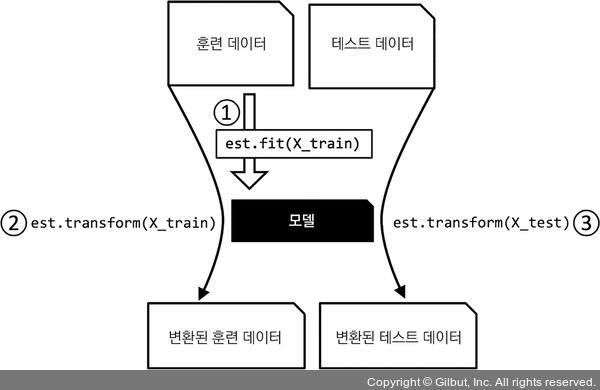

    - 사이킷런 추정기의 훈련과 예측 과정
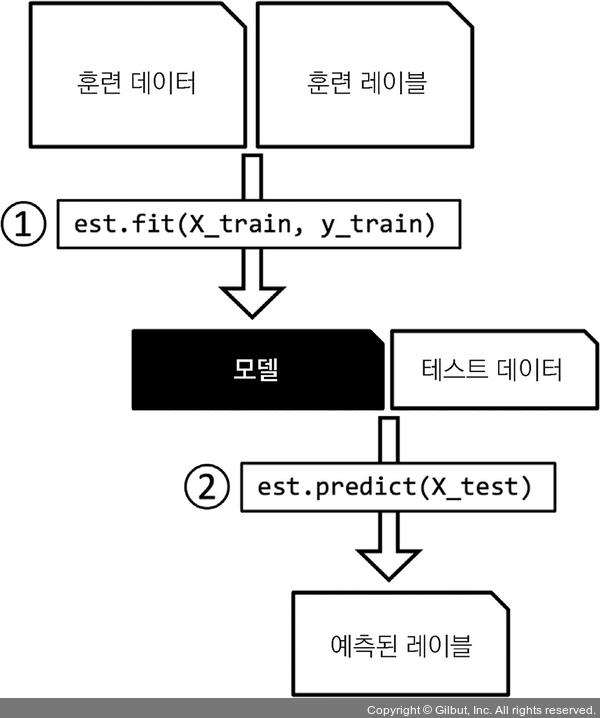